**About the data**

The dataset is used for this competition is synthetic (and generated using a CTGAN), but based on a real dataset. The original dataset deals with predicting the amount of an insurance claim. Although the features are anonymized, they have properties relating to real-world features.

# Setup


In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the data

In [7]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com"
HOUSING_PATH = os.path.join("SaraFadaei", "Insuranse-claim")
HOUSING_URL = DOWNLOAD_ROOT + "SaraFadaei/Insuranse-claim/train.tar.gz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "train.tar.gz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
fetch_housing_data()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [9]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "train.csv")
    return pd.read_csv(csv_path)

In [10]:
housing = load_housing_data()
housing.head()

FileNotFoundError: [Errno 2] No such file or directory: 'SaraFadaei\\Insuranse-claim\\train.csv'

In [7]:
# Preview the train data set
train_df.head()

cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont5     cont6  \
id                                                    ...                       
1     B    B    B    C    B    B    A    E    C    N  ...  0.400361  0.160266   
2     B    B    A    A    B    D    A    F    A    O  ...  0.533087  0.558922   
3     A    A    A    C    B    D    A    D    A    F  ...  0.650609  0.375348   
4     B    B    A    C    B    D    A    E    C    K  ...  0.668980  0.239061   
6     A    A    A    C    B    D    A    E    A    N  ...  0.686964  0.420667   

       cont7     cont8     cont9    cont10    cont11    cont12    cont13  \
id                                                                         
1   0.310921  0.389470  0.267559  0.237281  0.377873  0.322401  0.869850   
2   0.516294  0.594928  0.341439  0.906013  0.921701  0.261975  0.465083   
3   0.902567  0.555205  0.843531  0.748809  0.620126  0.541474  0.763846   
4   0.732948  0.679618  0.574844  0.346010  0.714610  0.540150  0.280682   
6   0.648182  0.684501  0.956692  1.000773  0.776742  0.625849  0.250823   

      target  
id            
1   8.113634  
2   8.481233  
3   8.364351  
4   8.049253  
6   7.972260  

[5 rows x 25 columns]

In [6]:
# Preview the test data set
test_df.head()

cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont4     cont5  \
id                                                    ...                       
0     B    B    B    C    B    B    A    E    E    I  ...  0.476739  0.376350   
5     A    B    A    C    B    C    A    E    C    H  ...  0.285509  0.860046   
15    B    A    A    A    B    B    A    E    D    K  ...  0.697272  0.683600   
16    B    B    A    C    B    D    A    E    A    N  ...  0.719306  0.777890   
17    B    B    A    C    B    C    A    E    C    F  ...  0.313032  0.431007   

       cont6     cont7     cont8     cont9    cont10    cont11    cont12  \
id                                                                         
0   0.337884  0.321832  0.445212  0.290258  0.244476  0.087914  0.301831   
5   0.798712  0.835961  0.391657  0.288276  0.549568  0.905097  0.850684   
15  0.404089  0.879379  0.275549  0.427871  0.491667  0.384315  0.376689   
16  0.730954  0.644315  1.024017  0.391090  0.988340  0.411828  0.393585   
17  0.390992  0.408874  0.447887  0.390253  0.648932  0.385935  0.370401   

      cont13  
id            
0   0.845702  
5   0.693940  
15  0.508099  
16  0.461372  
17  0.900412  

[5 rows x 24 columns]

In [18]:
# List of categorical columns
cat_features = [feature for feature in train_df.columns if 'cat' in feature]
cat_features

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9']

In [19]:
# List of continuous columns
cont_features = [feature for feature in train_df.columns if 'cont' in feature]
cont_features

['cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13']

In [9]:
#shape of train and test data set
print('Rows and Columns in train dataset:', train_df.shape)
print('Rows and Columns in test dataset:', test_df.shape)

Rows and Columns in train dataset: (300000, 25)
Rows and Columns in test dataset: (200000, 24)


In [10]:
#Generate descriptive statistics with df.describe()
train_df.describe().T

count      mean       std       min       25%       50%       75%  \
cont0   300000.0  0.527335  0.230599 -0.118039  0.405965  0.497053  0.668060   
cont1   300000.0  0.460926  0.214003 -0.069309  0.310494  0.427903  0.615113   
cont2   300000.0  0.490498  0.253346 -0.056104  0.300604  0.502462  0.647512   
cont3   300000.0  0.496689  0.219199  0.130676  0.329783  0.465026  0.664451   
cont4   300000.0  0.491654  0.240074  0.255908  0.284188  0.390470  0.696599   
cont5   300000.0  0.510526  0.228232  0.045915  0.354141  0.488865  0.669625   
cont6   300000.0  0.467476  0.210331 -0.224689  0.342873  0.429383  0.573383   
cont7   300000.0  0.537119  0.218140  0.203763  0.355825  0.504661  0.703441   
cont8   300000.0  0.498456  0.239920 -0.260275  0.332486  0.439151  0.606056   
cont9   300000.0  0.474872  0.218007  0.117896  0.306874  0.434620  0.614333   
cont10  300000.0  0.474492  0.255949  0.048732  0.276017  0.459975  0.691579   
cont11  300000.0  0.473216  0.222022  0.052608  0.308151  0.433812  0.642057   
cont12  300000.0  0.494561  0.247292 -0.074208  0.289074  0.422887  0.714502   
cont13  300000.0  0.508273  0.222950  0.151050  0.300669  0.472400  0.758447   
target  300000.0  8.241979  0.746555  0.140329  7.742071  8.191373  8.728634   

              max  
cont0    1.058443  
cont1    0.887253  
cont2    1.034704  
cont3    1.039560  
cont4    1.055424  
cont5    1.067649  
cont6    1.111552  
cont7    1.032837  
cont8    1.040229  
cont9    0.982922  
cont10   1.055960  
cont11   1.071444  
cont12   0.975035  
cont13   0.905992  
target  10.411992

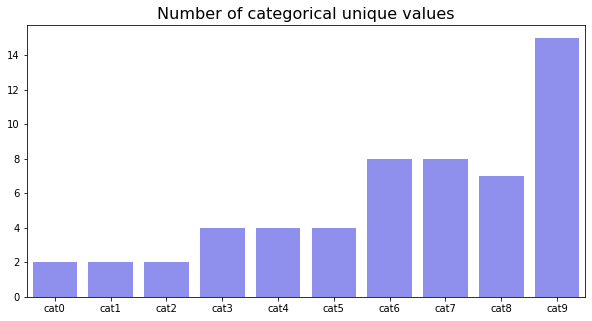

In [42]:
#number of categorical uniqe value
fig = plt.figure(figsize=(10,5))
sns.barplot(y=train_df[cat_features].nunique().values, x=train_df[cat_features].nunique().index, color='blue', alpha=.5)
plt.xticks(rotation=0)
plt.title('Number of categorical unique values',fontsize=16);

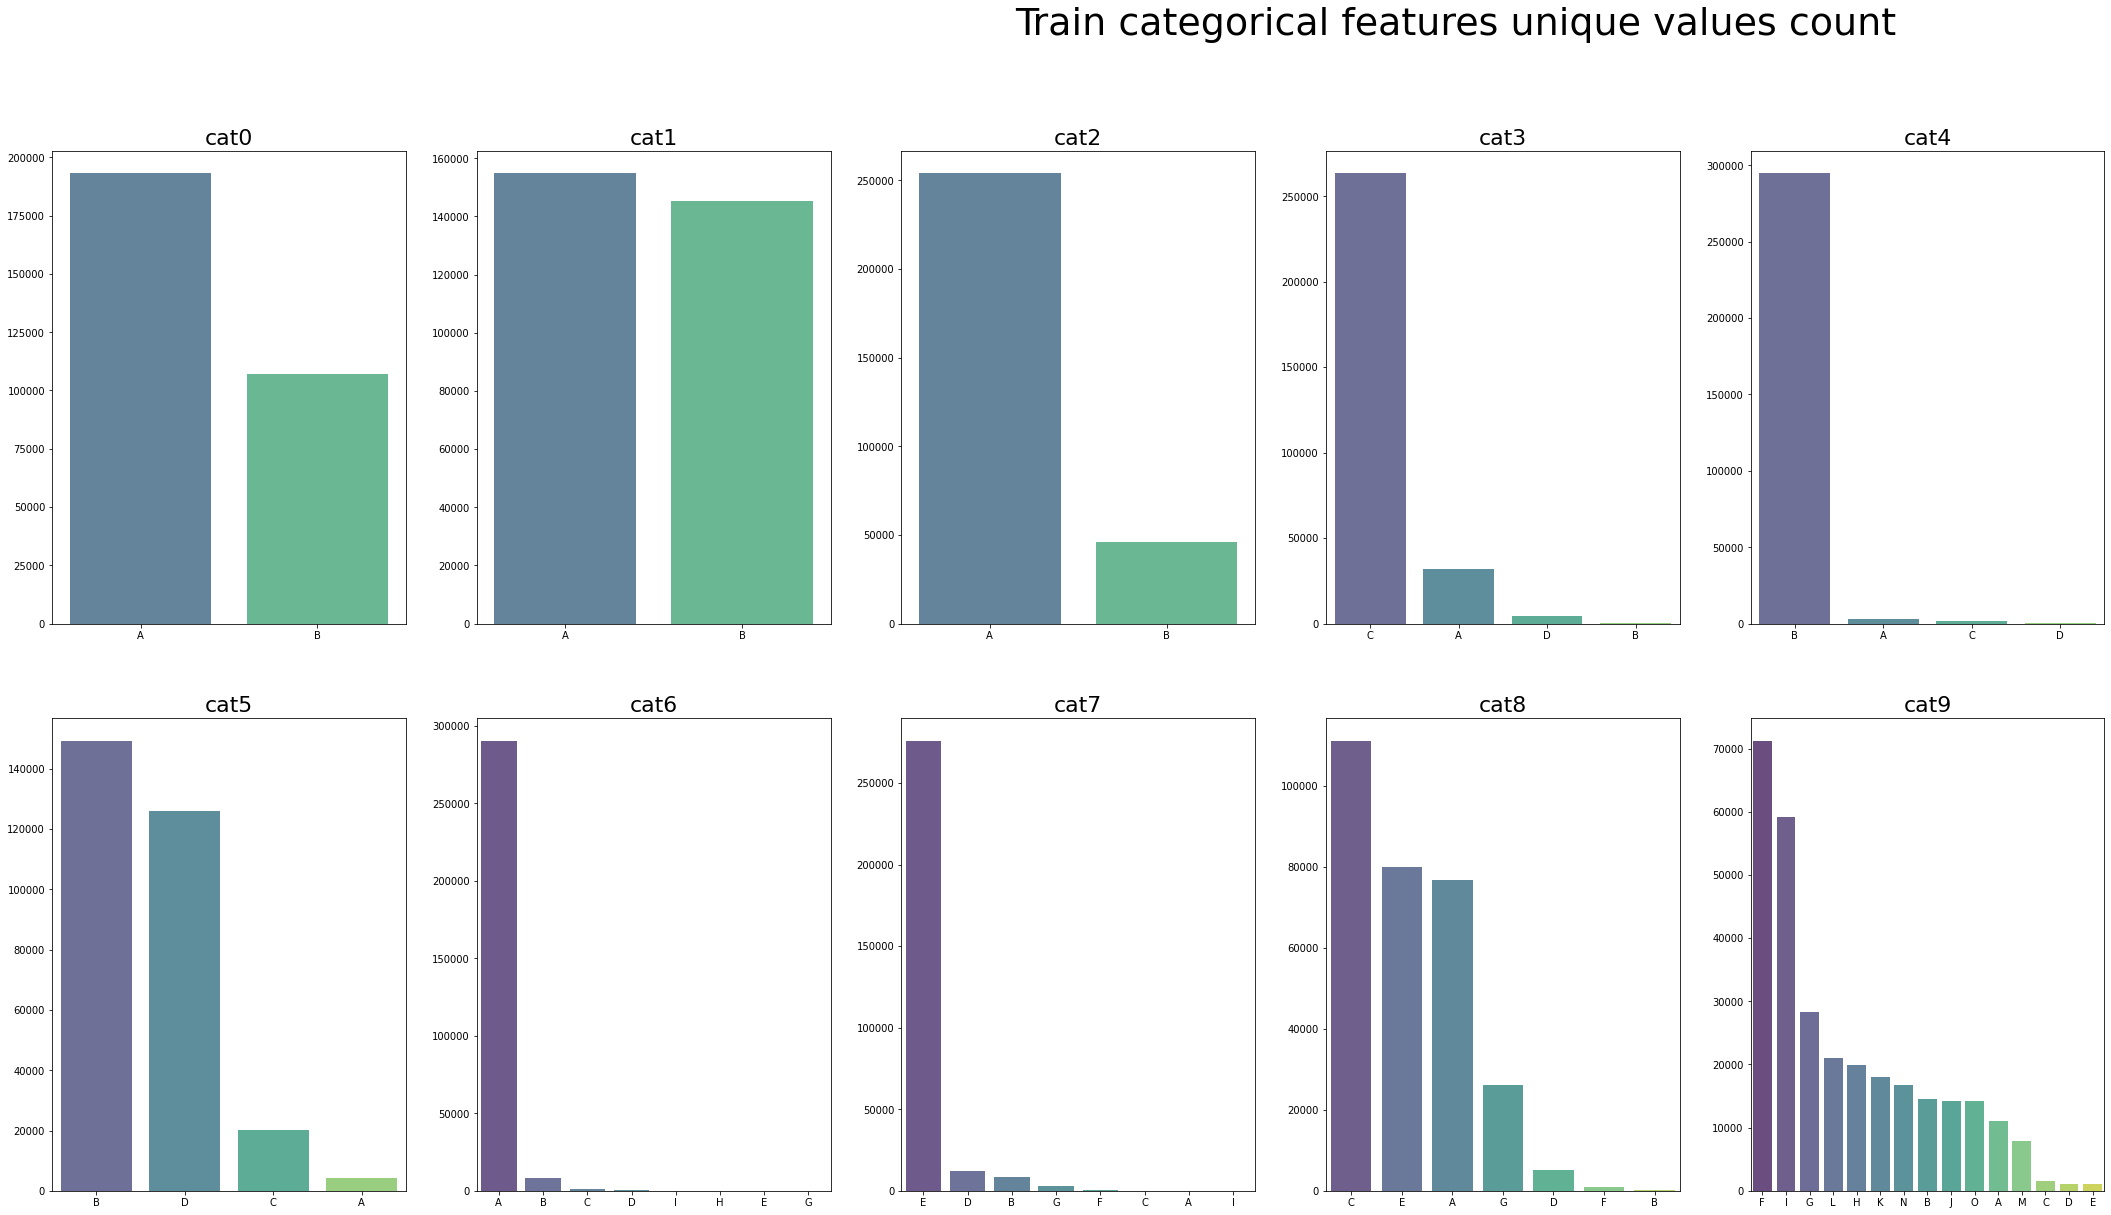

In [43]:
#train categorical features unique values count
fig = plt.figure(figsize=(52,40))
grid =  gridspec.GridSpec(4,7,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        order = list(train_df['cat'+str(n)].value_counts().index)
        sns.countplot(data= train_df, x='cat'+str(n),ax=ax, alpha =0.8,order=order,palette='viridis')
        ax.set_title('cat'+str(n),fontsize=22)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('Train categorical features unique values count', fontsize=38,y=.93);

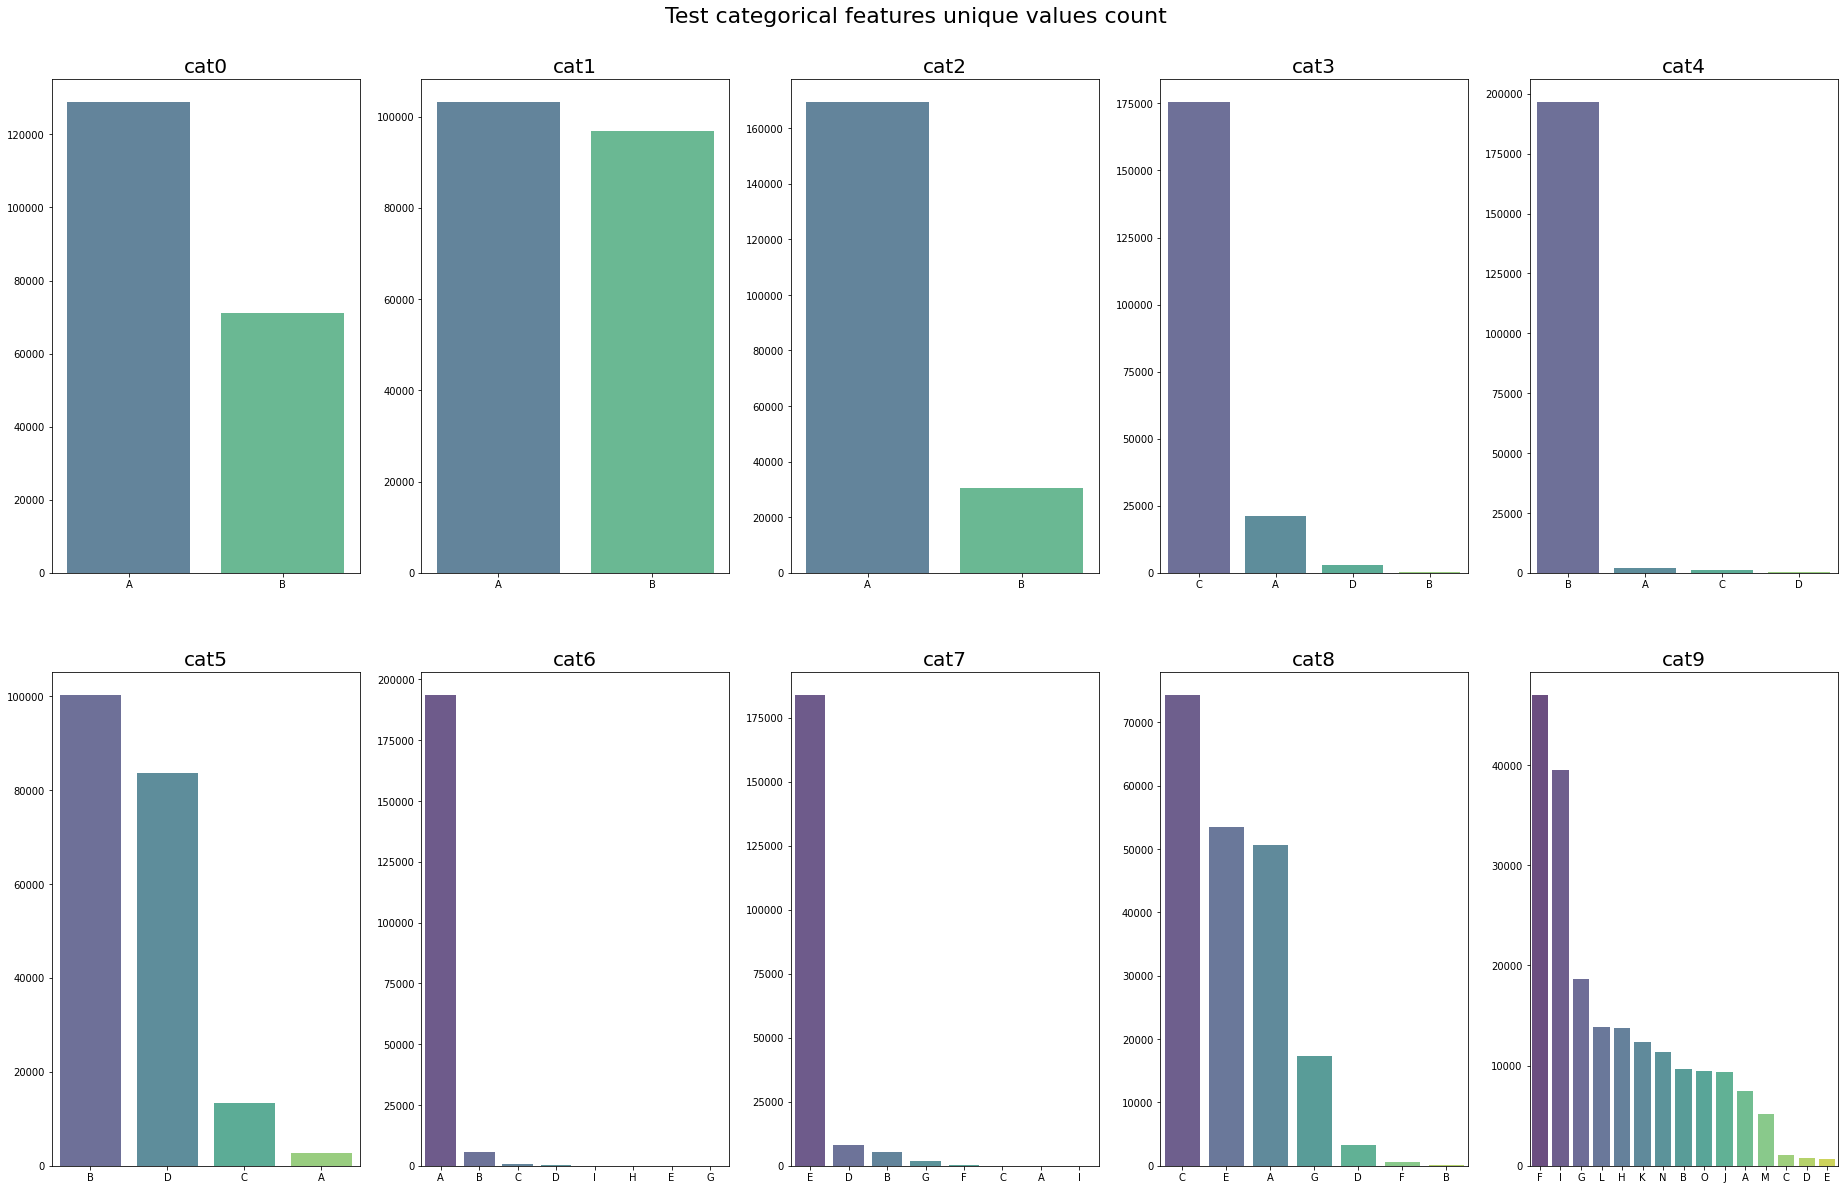

In [44]:
#Test categorical features unique values count
fig = plt.figure(figsize=(32,20))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        order = list(test_df['cat'+str(n)].value_counts().index)
        sns.countplot(data= test_df, x='cat'+str(n),ax=ax, alpha =0.8,order=order,palette='viridis')
        ax.set_title('cat'+str(n),fontsize=20)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('Test categorical features unique values count', fontsize=22,y=.93);

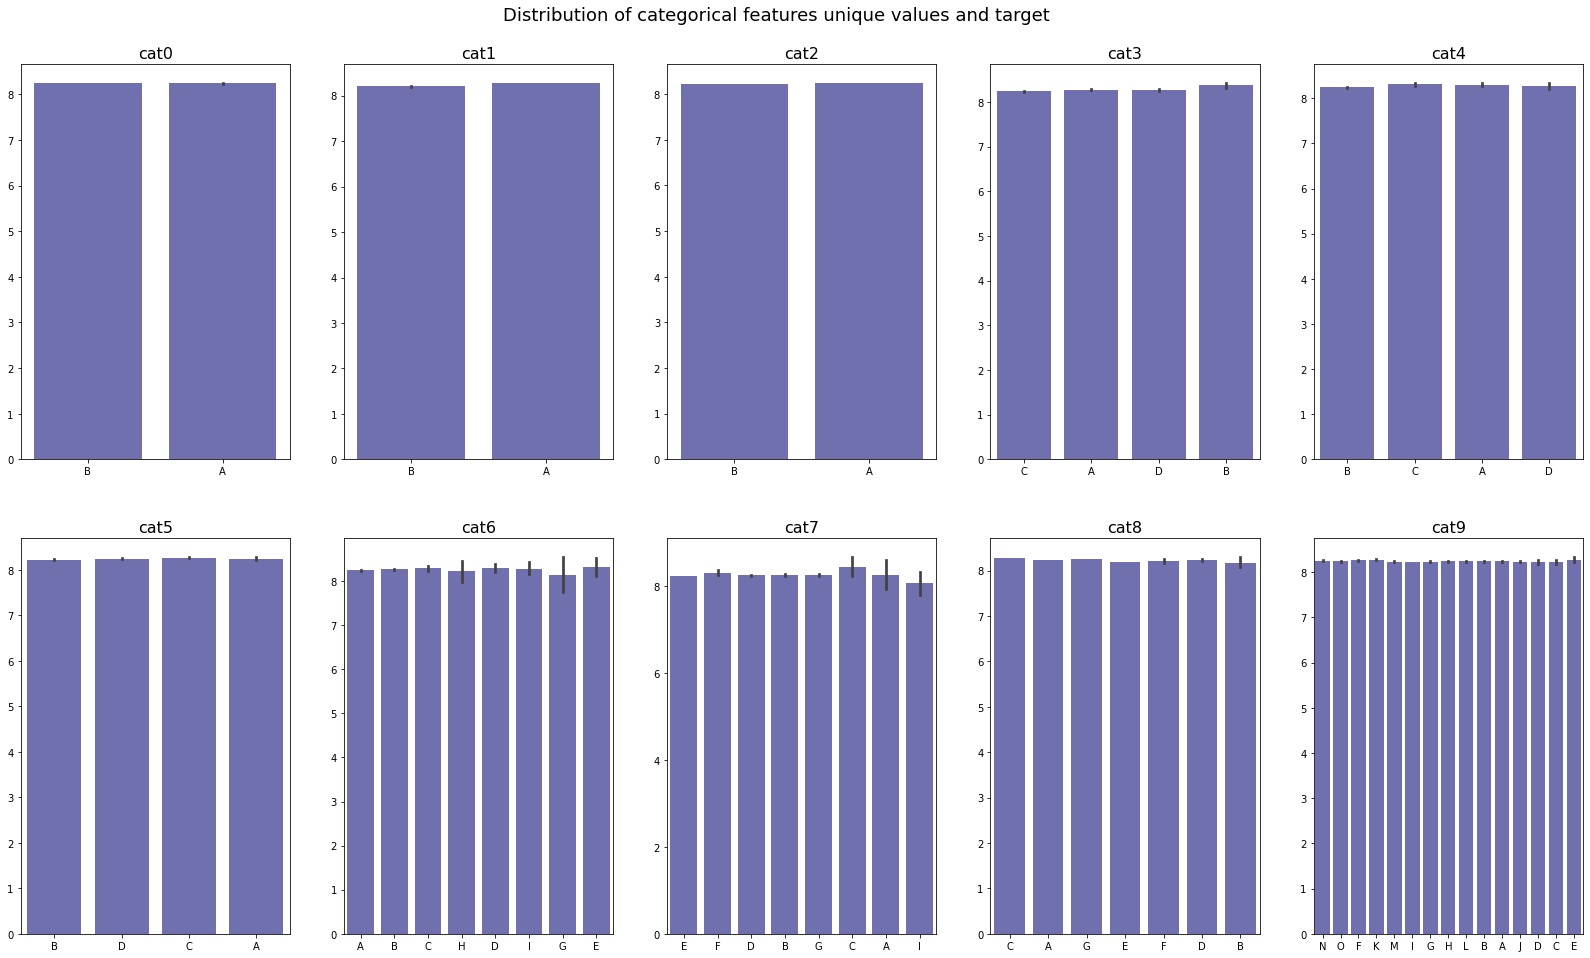

In [45]:
#Distribution of categorical features unique values and target
fig = plt.figure(figsize=(28,16))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        sns.barplot(data= train_df, y = 'target', x='cat'+str(n),ax=ax, alpha =.6,ci=95,
        color= 'darkblue',dodge=False )
        ax.set_title('cat'+str(n),fontsize=16)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('Distribution of categorical features unique values and target', fontsize=18,y=.93);

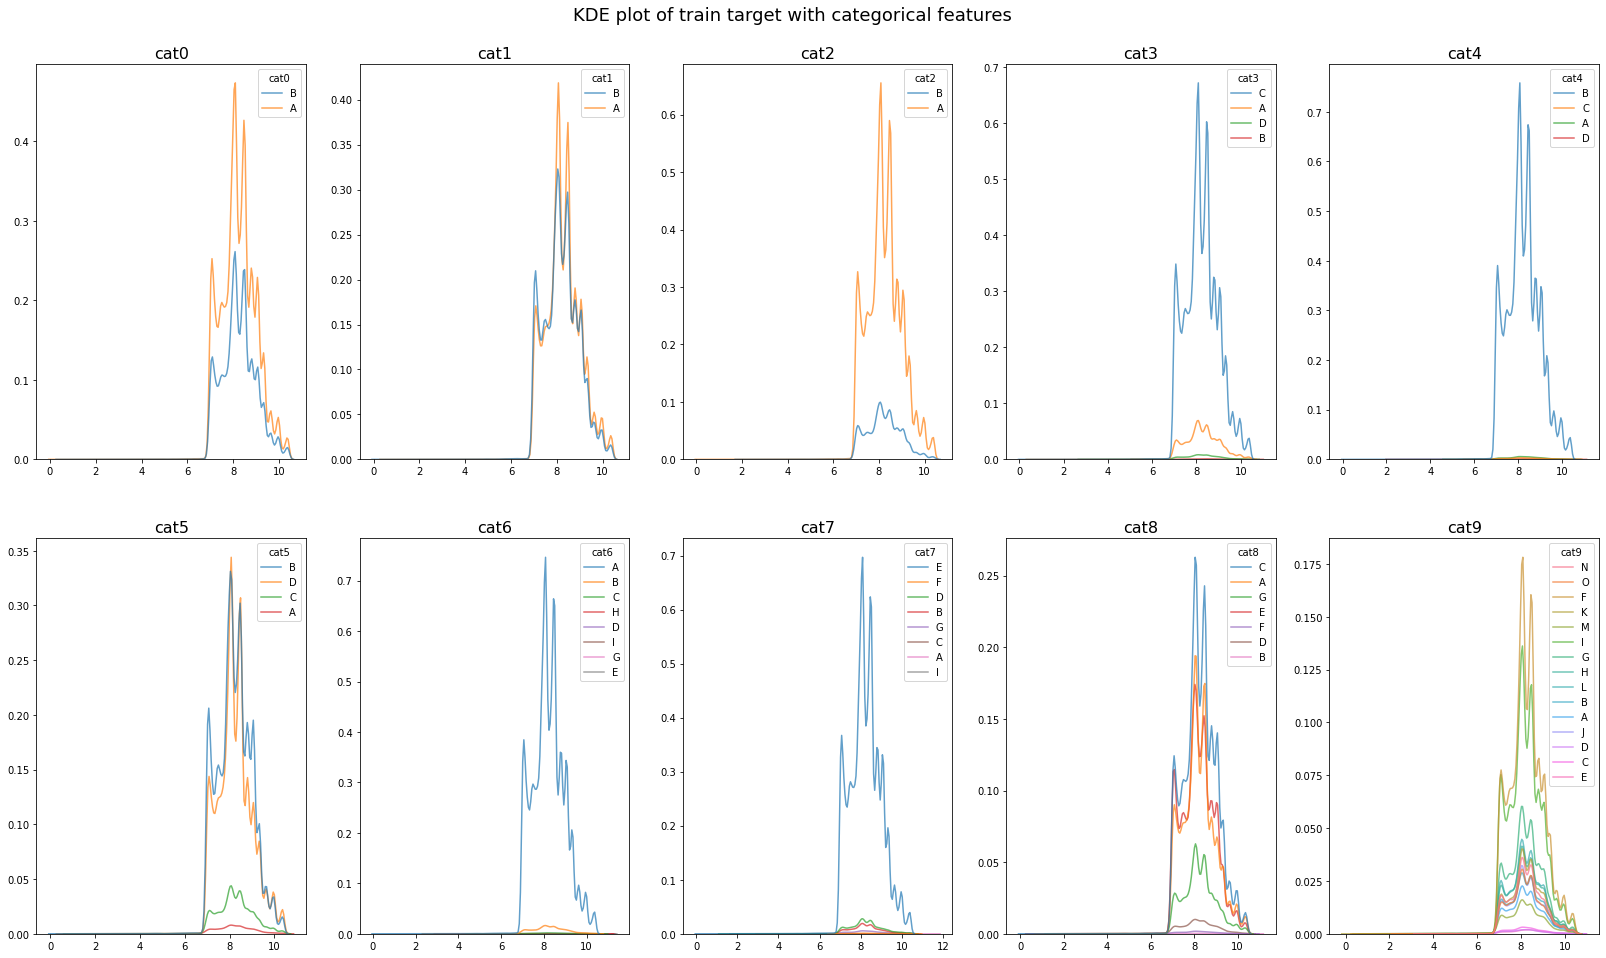

In [46]:
#KDE plot of train target with categorical features
fig = plt.figure(figsize=(28,16))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        sns.kdeplot(data = train_df, x = 'target', hue = 'cat'+str(n),ax=ax, alpha =.7, fill=False)
        ax.set_title('cat'+str(n),fontsize=16)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
        
fig.suptitle('KDE plot of train target with categorical features', fontsize=18,y=.93);

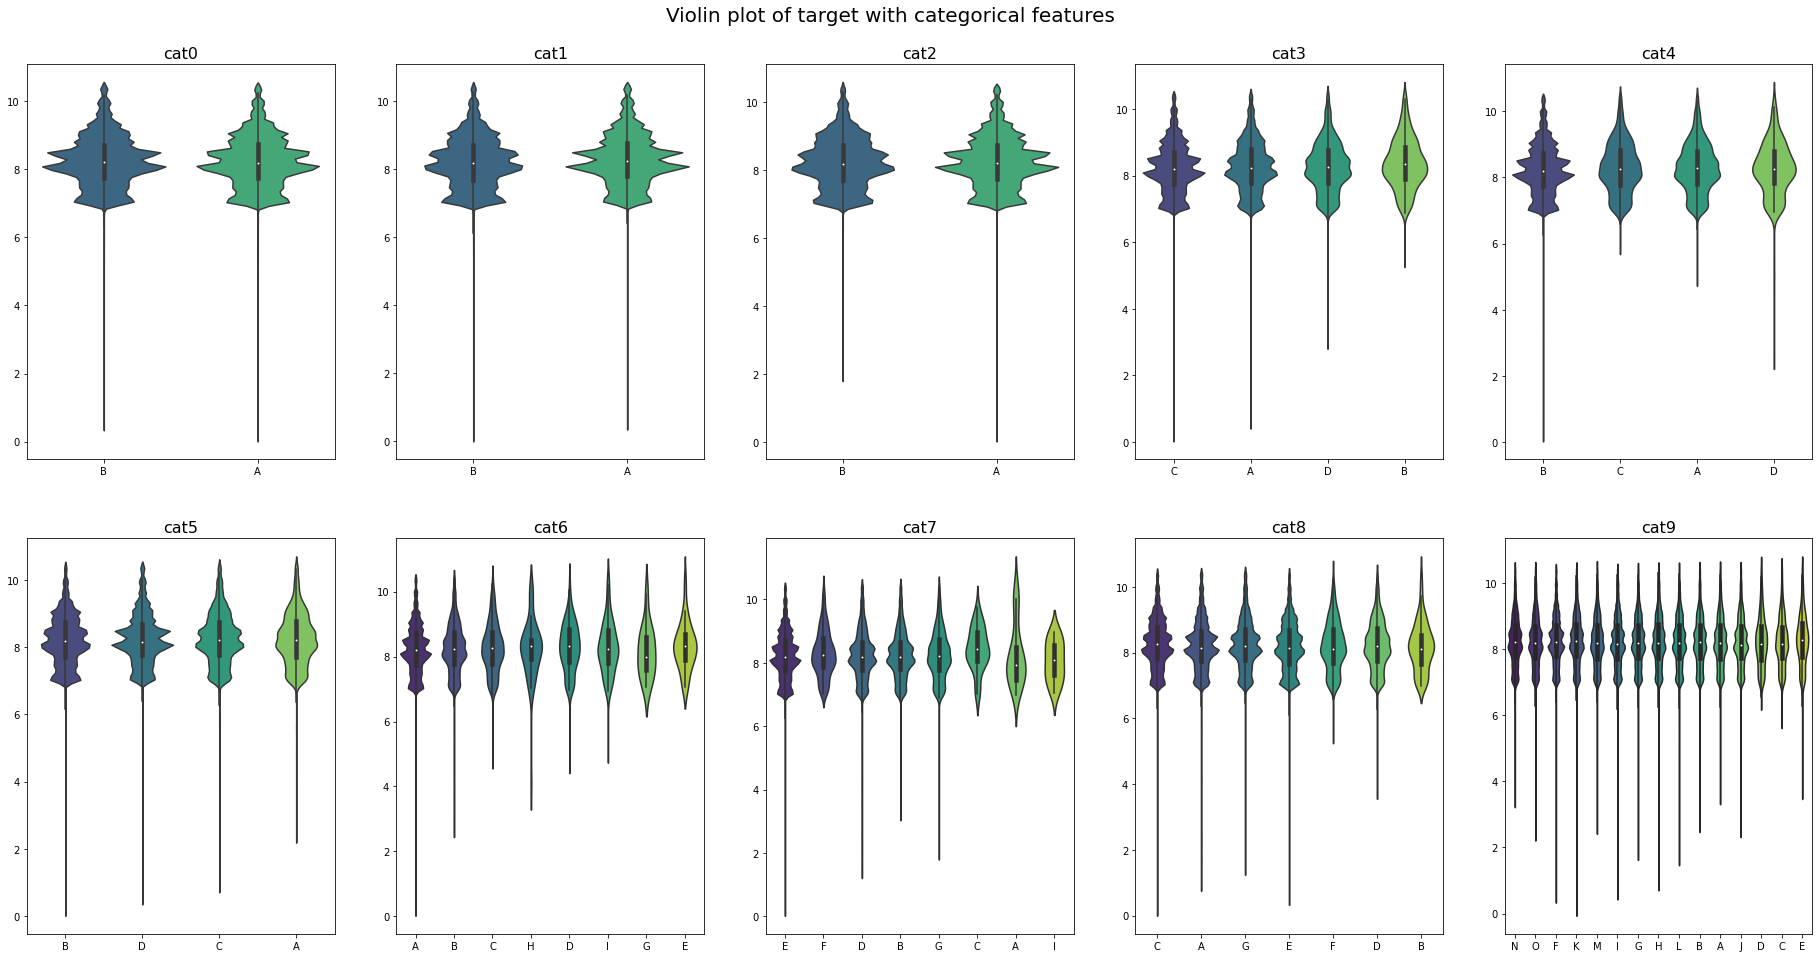

In [47]:
#Violin plot of target with categorical features
fig = plt.figure(figsize=(32,16))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        sns.violinplot(data = train_df, y = 'target', x = 'cat'+str(n),ax=ax, alpha =.7,
        fill=True,palette='viridis')
        ax.set_title('cat'+str(n),fontsize=16)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('Violin plot of target with categorical features', fontsize=20,y=.93);

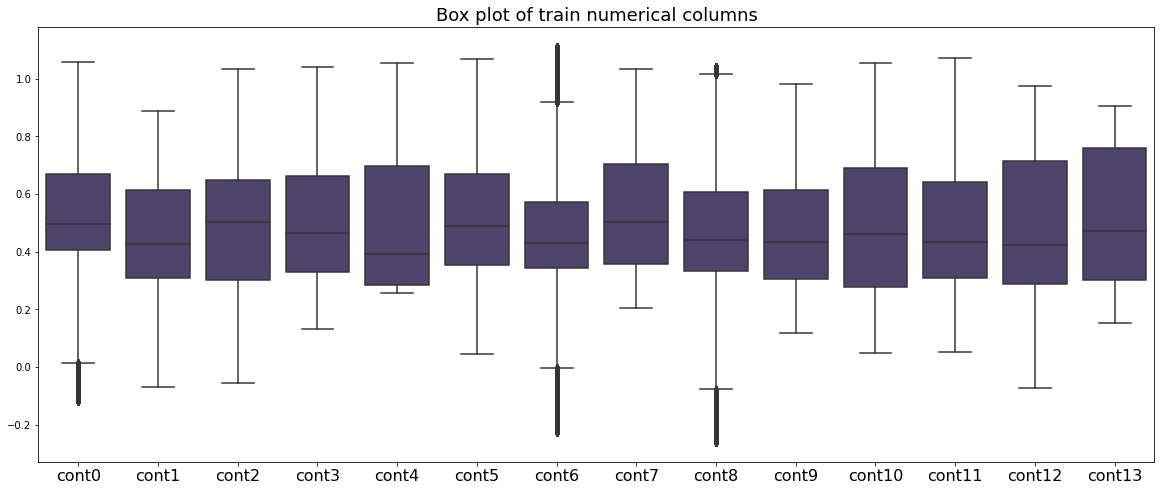

In [48]:
#Box plot of train numerical columns
v0 = sns.color_palette(palette='viridis').as_hex()[0]
fig = plt.figure(figsize=(20,8))
sns.boxplot(data=train_df[cont_features], color=v0,saturation=.5);
plt.xticks(fontsize= 16)
plt.title('Box plot of train numerical columns', fontsize=18);

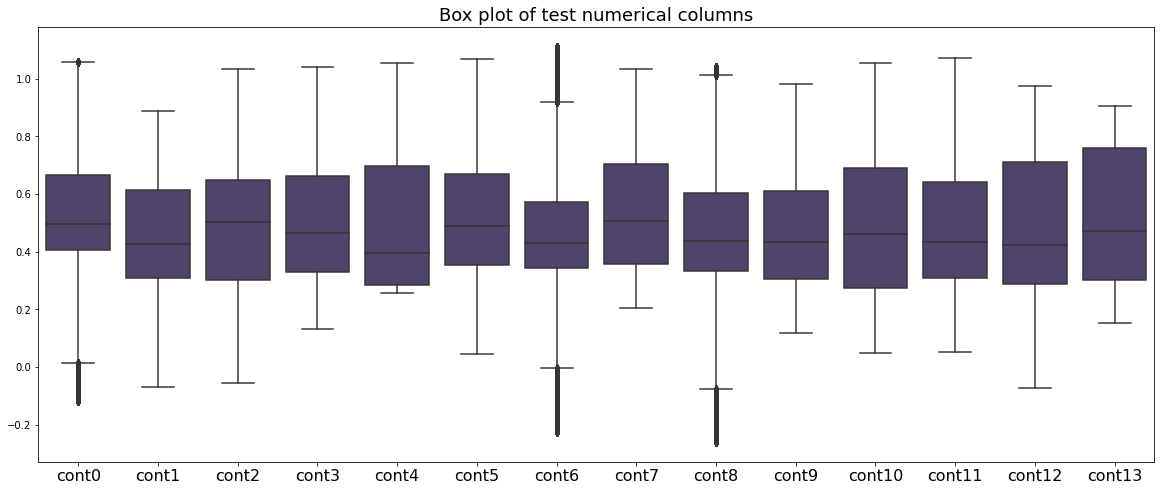

In [61]:
#Box plot of test numerical columns
fig = plt.figure(figsize=(20,8))
sns.boxplot(data=test_df[cont_features], color=v0,saturation=.5);
plt.xticks(fontsize= 16)
plt.title('Box plot of test numerical columns', fontsize=18);

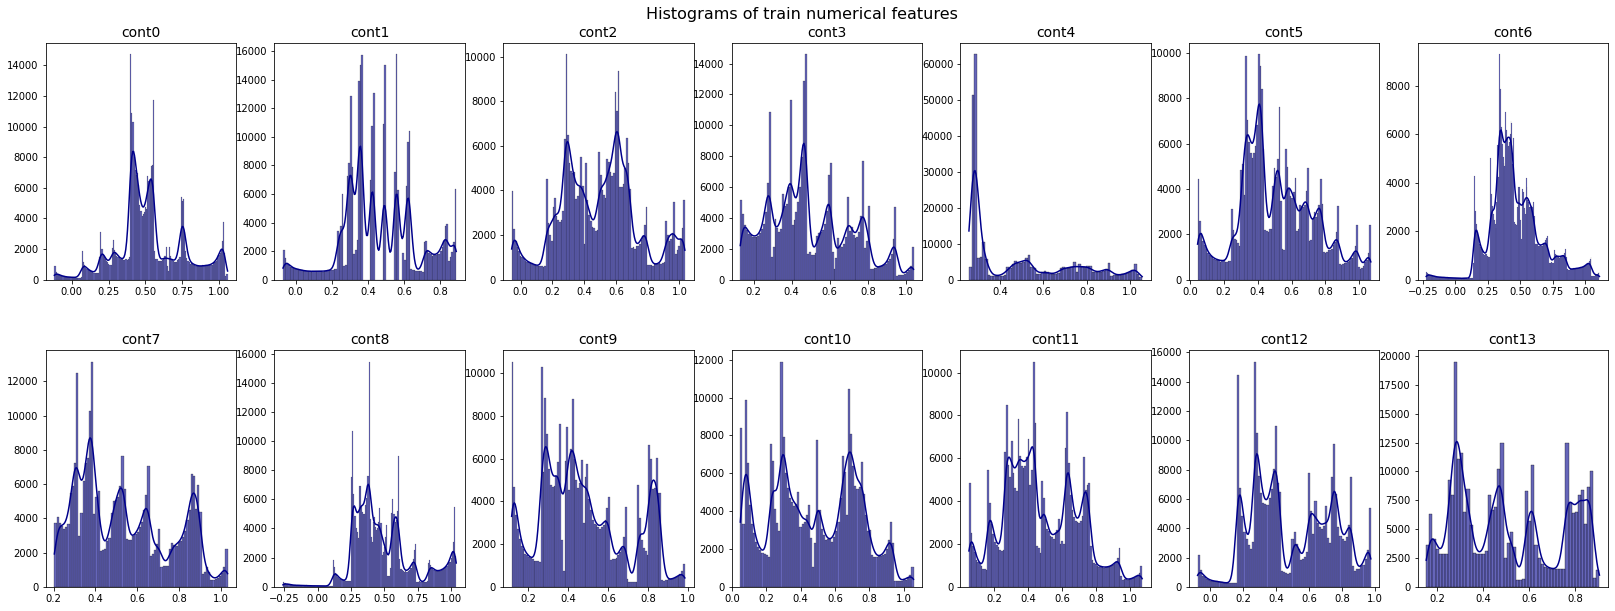

In [50]:
#Histograms of train numerical features
fig = plt.figure(figsize=(28,10))#,constrained_layout=True)
grid =  gridspec.GridSpec(2, 7, figure= fig, hspace= .3, wspace= .2)
n =0
for i in range(2):
    for j in range(7):
        ax = fig.add_subplot(grid[i, j])
        sns.histplot(data= train_df, x='cont'+str(n),ax=ax, alpha =.6, color= 'darkblue',kde=True)
        ax.set_title('cont'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
        
fig.suptitle('Histograms of train numerical features', fontsize=16,y=.93);

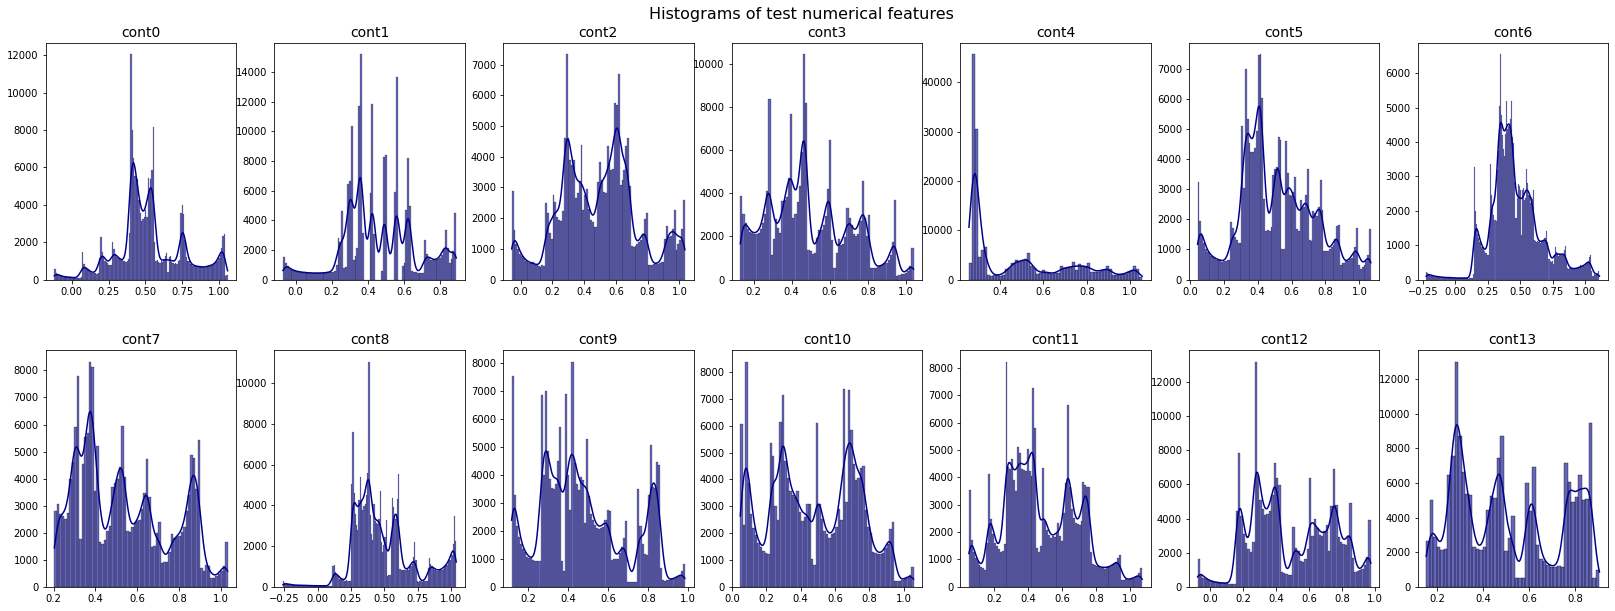

In [51]:
#Histograms of test numerical features
fig = plt.figure(figsize=(28,10))#,constrained_layout=True)
grid =  gridspec.GridSpec(2, 7, figure= fig, hspace= .3, wspace= .2)
n =0
for i in range(2):
    for j in range(7):
        ax = fig.add_subplot(grid[i, j])
        sns.histplot(data= test_df, x='cont'+str(n),ax=ax, alpha =.6, color= 'darkblue',kde=True)
        ax.set_title('cont'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
        
fig.suptitle('Histograms of test numerical features', fontsize=16,y=.93);

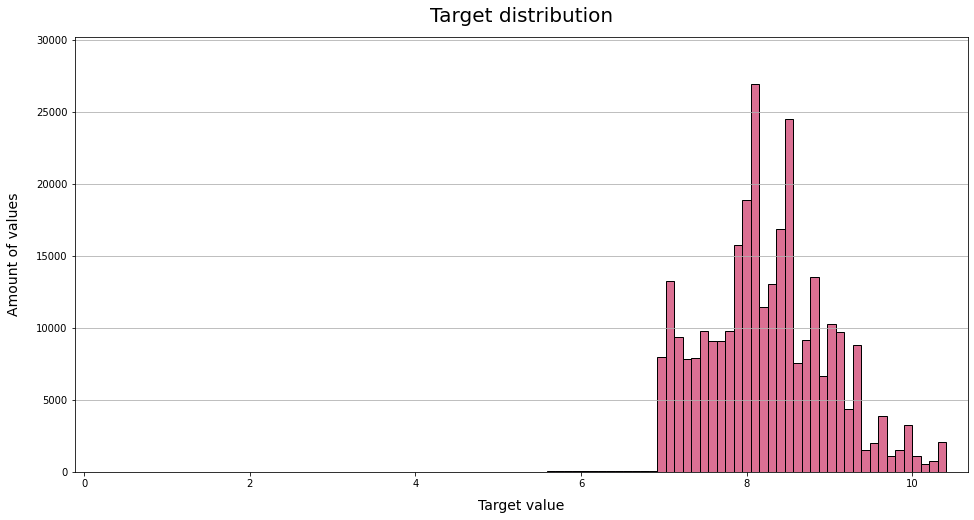

In [52]:
#Target distribution
fig, ax = plt.subplots(figsize=(16, 8))

bars = ax.hist(train_df["target"],
               bins=100,
               color="palevioletred",
               edgecolor="black")
ax.set_title("Target distribution", fontsize=20, pad=15)
ax.set_ylabel("Amount of values", fontsize=14, labelpad=15)
ax.set_xlabel("Target value", fontsize=14, labelpad=10)
ax.margins(0.025, 0.12)
ax.grid(axis="y")

In [25]:
print(f"{(train_df['target'] < 5).sum() / len(train_df) * 100:.3f}% of the target values are less than 5")
print(f"{(train_df['target'] > 6).sum() / len(train_df) * 100:.3f}% of the target values are greater than 6")

0.059% of the target values are less than 5
99.876% of the target values are greater than 6


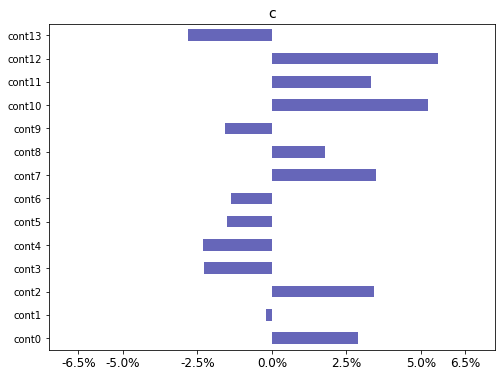

In [53]:
#Correlation between target and numerical variables
train_df.corr()['target'][:-1].plot.barh(figsize=(8,6),alpha=.6,color='darkblue')
plt.xlim(-.075,.075);
plt.xticks([-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065],
           [str(100*i)+'%' for i in [-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065]],fontsize=12)
plt.title('c',fontsize=14);

In [54]:
# correlationgrid of all numercialvariablesand target
train_df.corr().style.background_gradient(cmap='viridis')


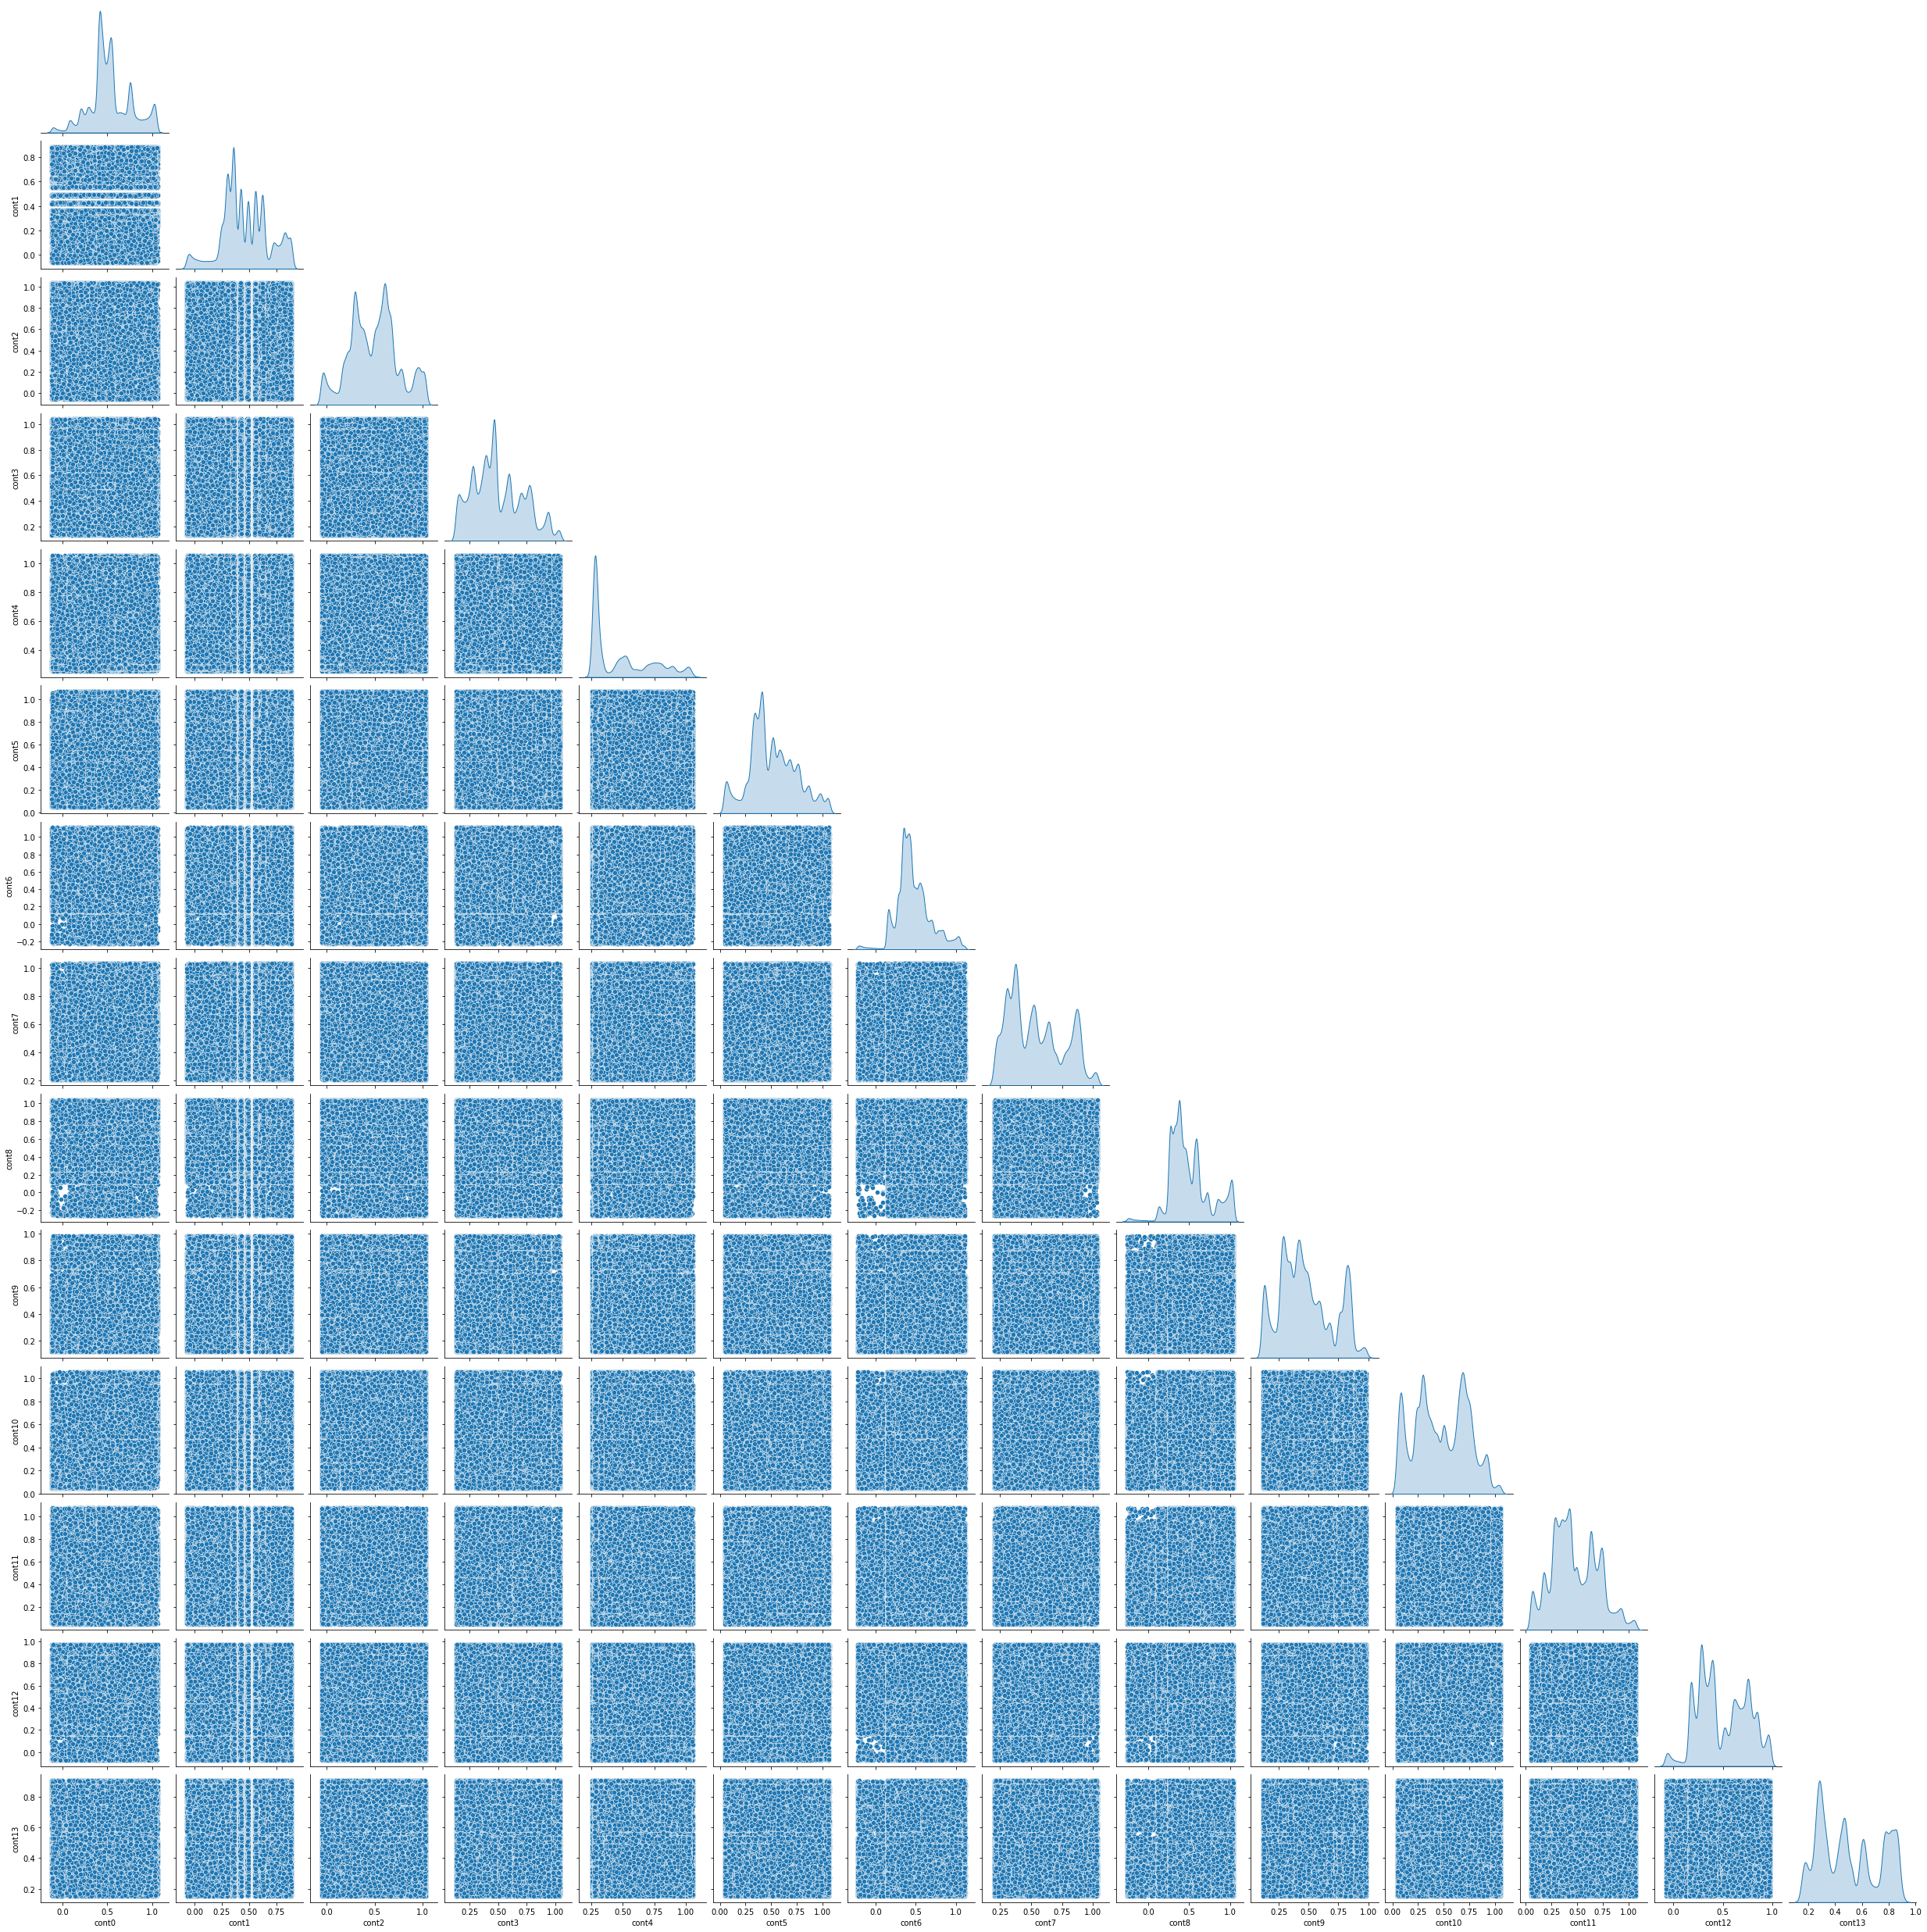

In [55]:
#grid scatter plots to investigate the numbers shown above
sns.pairplot(train_df[cont_features], corner=True, diag_kind='kde')

In [56]:
# missing value
print('Missing values in train dataset:', sum(train_df.isnull().mean()*100))
print('Missing values in test dataset:', sum(test_df.isnull().mean()*100))

Missing values in train dataset: 0.0
Missing values in test dataset: 0.0


In [57]:
# duplicates data
train_df.drop_duplicates()
train_df.shape

(300000, 25)

In [58]:
# Separate target from features
features = train_df.drop(['target'], axis=1)
y = train_df['target']

# Preview features

features.head()

cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont4     cont5  \
id                                                    ...                       
1     B    B    B    C    B    B    A    E    C    N  ...  0.610706  0.400361   
2     B    B    A    A    B    D    A    F    A    O  ...  0.276853  0.533087   
3     A    A    A    C    B    D    A    D    A    F  ...  0.285074  0.650609   
4     B    B    A    C    B    D    A    E    C    K  ...  0.284667  0.668980   
6     A    A    A    C    B    D    A    E    A    N  ...  0.287595  0.686964   

       cont6     cont7     cont8     cont9    cont10    cont11    cont12  \
id                                                                         
1   0.160266  0.310921  0.389470  0.267559  0.237281  0.377873  0.322401   
2   0.558922  0.516294  0.594928  0.341439  0.906013  0.921701  0.261975   
3   0.375348  0.902567  0.555205  0.843531  0.748809  0.620126  0.541474   
4   0.239061  0.732948  0.679618  0.574844  0.346010  0.714610  0.540150   
6   0.420667  0.648182  0.684501  0.956692  1.000773  0.776742  0.625849   

      cont13  
id            
1   0.869850  
2   0.465083  
3   0.763846  
4   0.280682  
6   0.250823  

[5 rows x 24 columns]

In [59]:
x=features.copy()
X_test = test_df.copy()

# ordinal-encode categorical columns
ordinal_encoder = OrdinalEncoder()
x[cat_features] = ordinal_encoder.fit_transform(features[cat_features])
X_test[cat_features] = ordinal_encoder.transform(test_df[cat_features])

# Preview the ordinal-encoded features
x.head()

cat0  cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  ...     cont4  \
id                                                              ...             
1    1.0   1.0   1.0   2.0   1.0   1.0   0.0   4.0   2.0  13.0  ...  0.610706   
2    1.0   1.0   0.0   0.0   1.0   3.0   0.0   5.0   0.0  14.0  ...  0.276853   
3    0.0   0.0   0.0   2.0   1.0   3.0   0.0   3.0   0.0   5.0  ...  0.285074   
4    1.0   1.0   0.0   2.0   1.0   3.0   0.0   4.0   2.0  10.0  ...  0.284667   
6    0.0   0.0   0.0   2.0   1.0   3.0   0.0   4.0   0.0  13.0  ...  0.287595   

       cont5     cont6     cont7     cont8     cont9    cont10    cont11  \
id                                                                         
1   0.400361  0.160266  0.310921  0.389470  0.267559  0.237281  0.377873   
2   0.533087  0.558922  0.516294  0.594928  0.341439  0.906013  0.921701   
3   0.650609  0.375348  0.902567  0.555205  0.843531  0.748809  0.620126   
4   0.668980  0.239061  0.732948  0.679618  0.574844  0.346010  0.714610   
6   0.686964  0.420667  0.648182  0.684501  0.956692  1.000773  0.776742   

      cont12    cont13  
id                      
1   0.322401  0.869850  
2   0.261975  0.465083  
3   0.541474  0.763846  
4   0.540150  0.280682  
6   0.625849  0.250823  

[5 rows x 24 columns]

In [112]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y,test_size=0.2, random_state=42)

## LinearR

In [116]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [118]:
some_data = x.iloc[:5]
some_labels = y.iloc[:5]
print("Predictions:", lin_reg.predict(x))
print("Labels:", list(some_labels))

Predictions: [8.18804306 8.47466365 8.18079    ... 8.24968263 8.15410359 8.36700017]
Labels: [8.113633879659153, 8.481232790694882, 8.364350599902433, 8.049253401382394, 7.972259905916037]


In [119]:
pred_lin = lin_reg.predict(x)
lin_rmse = mean_squared_error(y , pred_lin, squared=False)
lin_rmse

0.739158752804587

## k‑nearestneighbors(KNN)

In [120]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x, y)

KNeighborsRegressor()

In [110]:
some_data = x.iloc[:5]
some_labels = y.iloc[:5]

print("Predictions:", knn.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [7.9199914  7.90453593 8.44721649 8.56373479 7.76550278]
Labels: [8.113633879659153, 8.481232790694882, 8.364350599902433, 8.049253401382394, 7.972259905916037]


In [104]:
import numpy as np
pred_knn = knn.predict(x)
knn_mse = mean_squared_error(y , pred_knn)
knn_rmse=np.sqrt(knn_mse)
knn_rmse

0.6612192647182288

## DecisionTreeRegressor

In [105]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x, y)

DecisionTreeRegressor()

In [111]:
some_data = x.iloc[:5]
some_labels = y.iloc[:5]

print("Predictions:", tree_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [8.11363388 8.48123279 8.3643506  8.0492534  7.97225991]
Labels: [8.113633879659153, 8.481232790694882, 8.364350599902433, 8.049253401382394, 7.972259905916037]


In [106]:
pred_dt = tree_reg.predict(x)
tree_rmse = mean_squared_error(y , pred_dt, squared=False)
tree_rmse

8.348921989016312e-11

## cross validation

In [121]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, x, y,
                        scoring="neg_mean_squared_error", cv =10)
tree_rmse_scores = np.sqrt(-scores)

In [122]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
    
display_scores(tree_rmse_scores)

Scores: [1.05907662 1.05965659 1.05508093 1.05997111 1.05936561 1.05982917
 1.06598706 1.06441793 1.0643709  1.05513242]
Mean: 1.060288834168067
Standard deviation: 0.0035060961906938845


In [108]:
knn_scores = cross_val_score(knn, x, y,
                            scoring="neg_mean_squared_error", cv = 10)
knn_rmse_scores = np.sqrt(-knn_scores)
display_scores(knn_rmse_scores)

Scores: [0.80898567 0.80958445 0.81251576 0.80803919 0.80834575 0.80930183
 0.80844354 0.8075219  0.81320299 0.80734192]
Mean: 0.8093283005628077
Standard deviation: 0.0018967246844975054


## Random Forest


from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_val, y)
pred_forest = forest_reg.predict(x)
forest_rmse = mean_squared_error(y , pred_forest, squared=False)
forest_rmse

In [92]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X, y)
forest_reg_scores = cross_val_score(forest_reg, 
                                    x,
                                    y,
                            scoring="neg_mean_squared_error", 
                                    cv =10) 
forest_rmse_scores = np.sqrt(-forest_reg_scores)
print(forest_rmse_scores)


[0.73303013 0.73408111 0.74115329 0.73523452 0.73370924 0.7332805
 0.73777304 0.73619648 0.73797971 0.73217349]


In [109]:
display_scores(forest_rmse_scores)

Scores: [0.73303013 0.73408111 0.74115329 0.73523452 0.73370924 0.7332805
 0.73777304 0.73619648 0.73797971 0.73217349]
Mean: 0.7354611505517475
Standard deviation: 0.0026669824645494844


In [93]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 
     'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(n_jobs = -1)
grid_rf = GridSearchCV(forest_reg, param_grid_rf, cv =5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs = -1)
grid_rf.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [94]:
grid_rf.best_params_

{'max_features': 10, 'n_estimators': 30}

In [ ]:
grid_rf.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, n_jobs=-1)

In [95]:
cvres = grid_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], 
                              cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.8528118858693651 {'max_features': 2, 'n_estimators': 3}
0.7704803389240926 {'max_features': 2, 'n_estimators': 10}
0.7455758341111346 {'max_features': 2, 'n_estimators': 30}
0.8535626532226018 {'max_features': 4, 'n_estimators': 3}
0.7695739003927001 {'max_features': 4, 'n_estimators': 10}
0.7448637137657164 {'max_features': 4, 'n_estimators': 30}
0.8539809133685847 {'max_features': 6, 'n_estimators': 3}
0.7696641930654545 {'max_features': 6, 'n_estimators': 10}
0.7452561774122753 {'max_features': 6, 'n_estimators': 30}
0.8528298353947018 {'max_features': 8, 'n_estimators': 3}
0.7708550277411828 {'max_features': 8, 'n_estimators': 10}
0.7443796501113644 {'max_features': 8, 'n_estimators': 30}
0.8528489394379251 {'max_features': 10, 'n_estimators': 3}
0.7705257974141725 {'max_features': 10, 'n_estimators': 10}
0.7443347322531454 {'max_features': 10, 'n_estimators': 30}
0.8536139191309512 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.7709386415274951 {'bootstrap': False,

## xgb

In [80]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y,test_size=0.2, random_state=42)
from xgboost import XGBRegressor
model_XGB = XGBRegressor()
model_XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
pred_XGB = model_XGB.predict(X_valid)
print(mean_squared_error(y_valid, pred_XGB, squared=False))

0.7242812912900478


In [82]:
params = {'objective': ['reg:squarederror'],
              'n_estimators': [10000],
              'learning_rate': [0.02,0.04],
              'subsample': [0.926],
              'colsample_bytree': [0.118],
              'grow_policy':['lossguide'],
              'max_depth': [2,3],
              'booster': ['gbtree'], 
              'reg_lambda': [45.1],
              'reg_alpha': [34.9],
              'random_state': [42],
              'reg_lambda': [0.00087],
              'reg_alpha': [23.132]}

In [83]:
reg = xgb.XGBRegressor()

In [84]:
grid_xgb = GridSearchCV(estimator=reg, param_grid= params,scoring= 'neg_root_mean_squared_error',
          verbose= False, return_train_score= False, n_jobs=-1)

In [85]:
grid_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,...
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [0.118],
                         'grow_policy': ['lossguide'],
                         'learning_rate': [0.02, 0.04], 'max_depth': [2, 3],
                    

In [86]:
grid_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.118, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.02, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=8,
             num_parallel_tree=1, random_state=42, reg_alpha=23.132,
             reg_lambda=0.00087, scale_pos_weight=1, subsample=0.926,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
grid_xgb.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.118,
 'grow_policy': 'lossguide',
 'learning_rate': 0.02,
 'max_depth': 3,
 'n_estimators': 10000,
 'objective': 'reg:squarederror',
 'random_state': 42,
 'reg_alpha': 23.132,
 'reg_lambda': 0.00087,
 'subsample': 0.926}

In [88]:
-grid_xgb.best_score_

0.7172081278932275

In [96]:
pred1 = np.zeros(train_df.shape[0])
pred2 = np.zeros(train_df.shape[0])

test1 = np.zeros(test_df.shape[0])
test2 = np.zeros(test_df.shape[0])


kf = KFold(n_splits=5,random_state=48,shuffle=True)
n=0


for trn_idx, test_idx in kf.split(x,y):
    print(f"fold: {n+1}")
    X_tr,X_val=x.iloc[trn_idx],x.iloc[test_idx]
    y_tr,y_val=y.iloc[trn_idx],y.iloc[test_idx]
    
    
    model1 = grid_xgb
    model1.fit(X_tr,y_tr,eval_set=[(X_val,y_val)],early_stopping_rounds=200,verbose=False)
    pred1[test_idx] = model1.predict(X_val)
    test1 += model1.predict(X_test)/kf.n_splits
    rmse1 = mean_squared_error(y_val, model1.predict(X_val), squared=False)
    print(": model1 rmse = {}".format(rmse1))

    model2 = grid_rf
    model2.fit(X_tr,y_tr)
    pred2[test_idx] = model2.predict(X_val)
    test2 += model2.predict(X_test)/kf.n_splits
    rmse2 = mean_squared_error(y_val, model2.predict(X_val), squared=False)
    print(": model2 rmse = {}".format(rmse2))
    

    n+=1

fold: 1
: model1 rmse = 0.7154927488882399
: model2 rmse = 0.7440715499694267
fold: 2
: model1 rmse = 0.7196315867682304
: model2 rmse = 0.7476812329274888
fold: 3
: model1 rmse = 0.7105773186542425
: model2 rmse = 0.7371018079783218
fold: 4
: model1 rmse = 0.7169922867348235
: model2 rmse = 0.7445330072864752
fold: 5
: model1 rmse = 0.7193655055659058
: model2 rmse = 0.7478026121364748


In [65]:
test_idx

array([     2,     13,     19, ..., 299988, 299992, 299995])

In [97]:
stacked_predictions = np.column_stack((pred1,pred2))
stacked_test_predictions = np.column_stack((test1,test2))

In [62]:
stacked_predictions

array([[8.45983791, 8.58866066],
       [8.34545422, 8.382961  ],
       [8.1856041 , 8.08528828],
       ...,
       [8.10149288, 8.12451696],
       [8.14525795, 8.05267549],
       [8.31579494, 8.30916331]])

In [64]:
stacked_test_predictions

array([[8.06033051, 8.08455019],
       [8.35575175, 8.25460591],
       [8.40591335, 8.43995441],
       ...,
       [8.49281192, 8.36505418],
       [8.15538287, 8.10858514],
       [7.97188246, 8.17131038]])

In [98]:
l1_train = pd.DataFrame(data={
    "xgb": pred1.tolist(),
    "RandomForest": pred2.tolist(),
    "target":train_df.target
    })
l1_test = pd.DataFrame(data={
    "xgb": test1.tolist(),
    "RandomForest": test2.tolist(),
    })

In [99]:
l1_train

xgb  RandomForest    target
id                                      
1       8.443668      8.347981  8.113634
2       8.381036      8.306212  8.481233
3       8.173098      7.954621  8.364351
4       8.373171      8.253858  8.049253
6       8.259466      7.853938  7.972260
...          ...           ...       ...
499993  8.382695      8.310627  7.945605
499996  7.766342      8.068550  7.326118
499997  8.126604      8.065345  8.706755
499998  8.055099      8.280859  7.229569
499999  8.229765      8.312861  8.631146

[300000 rows x 3 columns]

In [100]:
kf = KFold(n_splits=5,random_state=48,shuffle=True)
final_prediction = np.zeros(test_df.shape[0])
rmse=[]  # list contains rmse for each fold
n=0
for trn_idx, test_idx in kf.split(stacked_predictions,y):
    X_tr,X_val=stacked_predictions[trn_idx],stacked_predictions[test_idx]
    y_tr,y_val=y.iloc[trn_idx],y.iloc[test_idx]
    
    meta_model = grid_xgb
    meta_model.fit(X_tr,y_tr)
    
    final_prediction +=meta_model.predict(stacked_test_predictions)/kf.n_splits
    rmse.append(mean_squared_error(y_val, meta_model.predict(X_val), squared=False))
    print(f"fold: {n+1}, rmse: {rmse[n]}")
    n+=1

fold: 1, rmse: 0.7158039197384573
fold: 2, rmse: 0.7198233613089859
fold: 3, rmse: 0.7105660526456753
fold: 4, rmse: 0.7172970175195369
fold: 5, rmse: 0.7196733202309457


In [101]:
np.mean(rmse)

0.7166327342887202

In [102]:
# Use the model to generate predictions

# Save the predictions to a CSV file
output = pd.DataFrame({'Id': X_test.index,
                       'target': final_prediction})

output

output
output.to_csv('submission00.csv', index=False);

Public Score after submitting in kaggle: 0.71723